In [1]:
import requests
import pandas as pd
import os
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
# Função para extrair a taxa CDI do site do Banco Central
def extrair_taxa_cdi():
    url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.12/dados?formato=json"
    try:
        response = requests.get(url, timeout=10)  # Faz uma requisição HTTP GET ao URL com um timeout de 10 segundos
        response.raise_for_status()  # Levanta uma exceção para códigos de status HTTP ruins
        data = response.json()  # Faz o parsing do conteúdo JSON
        taxa_cdi = data[-1]['valor']  # Extrai a última taxa CDI disponível
        return taxa_cdi  # Retorna a taxa CDI extraída
    except requests.exceptions.RequestException as e:
        print(f"Erro ao acessar a URL: {e}")
        return None

In [3]:
# Função para salvar a taxa CDI em um arquivo CSV

def salvar_taxa_cdi(taxa):
    data_hora = datetime.now().strftime('%Y-%m-%d %H:%M:%S')  # Obtém a data e hora atuais formatadas
    file_exists = os.path.isfile('taxa-cdi.csv')  # Verifica se o arquivo CSV já existe
    
    if file_exists:
        df = pd.read_csv("taxa-cdi.csv")  # Lê o arquivo CSV existente
    else:
        df = pd.DataFrame(columns=['data_hora', 'taxa'])  # Cria um DataFrame vazio com colunas específicas
    
    # Adiciona uma nova linha ao DataFrame com a data/hora e a taxa
    new_row = pd.DataFrame({'data_hora': [data_hora], 'taxa': [taxa]})
    df = pd.concat([df, new_row], ignore_index=True)
    
    df.to_csv('taxa-cdi.csv', index=False)  # Salva o DataFrame no arquivo CSV


In [4]:
if __name__ == "__main__":
    for _ in range(10):
        taxa_cdi = extrair_taxa_cdi()  # Extrai a taxa CDI
        if taxa_cdi is not None:
            salvar_taxa_cdi(taxa_cdi)  # Salva a taxa CDI no arquivo CSV
        time.sleep(1)  # Espera 1 segundo entre as execuções


In [5]:
df = pd.read_csv('taxa-cdi.csv')
display(df)

,data_hora,taxa
0,2024-06-26 16:22:03,0.03927
1,2024-06-26 16:22:05,0.03927
2,2024-06-26 16:22:06,0.03927
3,2024-06-26 16:22:08,0.03927
4,2024-06-26 16:22:09,0.03927
5,2024-06-26 16:22:11,0.03927
6,2024-06-26 16:22:12,0.03927
7,2024-06-26 16:22:14,0.03927
8,2024-06-26 16:22:15,0.03927
9,2024-06-26 16:22:17,0.03927


In [6]:
df.head(n=10)
df.dtypes

data_hora     object
taxa         float64
dtype: object

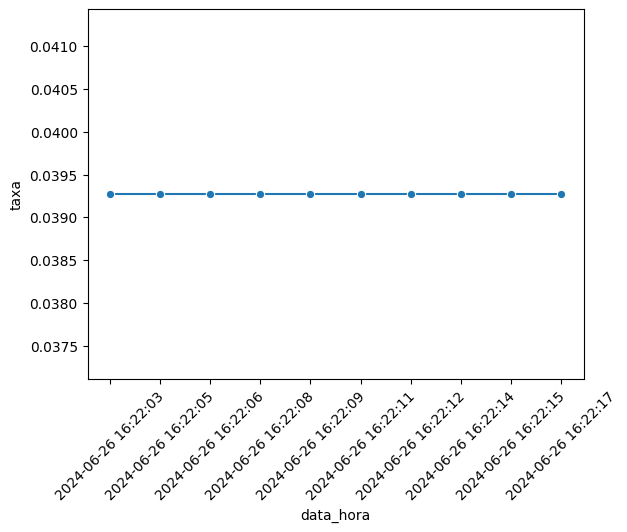

In [7]:
plot_df = sns.lineplot(x='data_hora', y='taxa', data=df, marker='o') 
plot_df.tick_params(axis='x', labelrotation=45)


In [8]:
print(type(plot_df))

<class 'matplotlib.axes._axes.Axes'>


In [9]:
plot_df.figure.savefig('grafico.jpg')